## Задание:

1) Предобработайте данные: категориальные признаки преобразуйте с помощью pd.get_dummies или его аналогом  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a>. Придумайте, что можно сделать с тем случаем, когда get_dummies создает слишком много колонок. 

Заполните пропуски. Для "древесных" алгоритмов, как правило, пропуски заполняются несуществующими значениями, которые далеко отстоят от реальных значений.

2) Поставьте n_estimators=400 и найдите ту комбинацию признаков в датасете, которая дает лучший результат.

In [2]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.read_csv('train.csv')

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [217]:
df = pd.read_csv('train.csv')
y = df[u'OutcomeType'].values
df['SexuponOutcome'] = df['SexuponOutcome'].fillna('Unknown')
df['AnimalType'] = df['AnimalType'].map({'Dog': 0, 'Cat': 1})
df['AgeuponOutcome'] = df['AgeuponOutcome'].fillna('unknown')

def get_age_in_weeks(age_str):
    if age_str == 'unknown':
        return -50
    number, time_period = age_str.split()
    multiplicator = 1
    if time_period == 'years':
        multiplicator = 365 / 7
    elif time_period == 'months':
        multiplicator = 30 / 7
    return int(number) * multiplicator

df['AgeuponOutcome'] = df['AgeuponOutcome'].map(get_age_in_weeks)
del df['OutcomeSubtype']
del df['AnimalID']

In [218]:
import datetime, time
def date_str2timestamp(line):
    d = datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S')
    return int(time.mktime(d.timetuple()))

df['Timestamp'] = df['DateTime'].map(date_str2timestamp)

In [219]:
gender_and_stirilization = pd.get_dummies(df['SexuponOutcome'], 
                                          prefix='GAndS', 
                                          drop_first=True)
df = pd.concat([df, gender_and_stirilization], axis=1)
del df['SexuponOutcome']

In [220]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400, oob_score=True, n_jobs=6, 
                             random_state=42)
print clf.fit(df[['AnimalType']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'Timestamp']], y).oob_score_

0.44902540312
0.560327733922
0.634254929103
0.572374574432


## Timestamp переобучает!!!

In [221]:
def date_str2year(line):
    return int(line.split('-')[0])
    
def date_str2month(line):
    return int(line.split('-')[1])

def date_str2day(line):
    return int(line.split('-')[2].split()[0])

def date_str2clock(line):
    hours, minutes = line.split()[1].split(':')[:2]
    return int(minutes) + int(hours) * 60

def date_str2weekday(line):
    return datetime.datetime.strptime(line, '%Y-%m-%d %H:%M:%S').weekday()


df['year'] = df['DateTime'].map(date_str2year)
df['month'] = df['DateTime'].map(date_str2month)
df['day'] = df['DateTime'].map(date_str2day)
df['clock'] = df['DateTime'].map(date_str2clock)
df['weekday'] = df['DateTime'].map(date_str2weekday)

In [222]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday']], y).oob_score_

0.629877660967
0.605447267013
0.599199371469
0.660593363014
0.67784054772


## Успех!

In [225]:
def breed_has_mix(breed):
    return 1 if 'mix' in breed.lower() else 0

def breed_has_slash(breed):
    return 1 if '/' in breed.lower() else 0
    
df['mix'] = df['Breed'].map(breed_has_mix)
df['slash'] = df['Breed'].map(breed_has_slash)

In [226]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'mix']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'slash']], y).oob_score_
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'mix', 'slash']], y).oob_score_

0.676792996371
0.679449287291
0.678139848105


In [229]:
def normalize_breef(breef):
    return breef.replace('/', ' ').lower()


df['Breed'] = df['Breed'].map(normalize_breef)

In [230]:
df['breed_words_count'] = df['Breed'].map(lambda x: x.count(' '))

In [231]:
print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count']], y).oob_score_

print clf.fit(df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']], y).oob_score_

0.678738448876
0.680571663736


## Успех!

## CountVectorizer

In [232]:
X = df[['AnimalType', 'AgeuponOutcome',
                  'GAndS_Intact Male', 'GAndS_Neutered Male',
                  'GAndS_Spayed Female', 'GAndS_Unknown',
                  'year', 'month', 'day', 'clock', 'weekday',
                  'breed_words_count', 'slash']].values

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X_breed_one_hot = vectorizer.fit_transform(df['Breed']).toarray()
# X_with_one_hot = np.hstack((X, breed_hashed))
# clf.fit(X_with_one_hot, y).oob_score_

### Most frequent:

In [ ]:
# most_frequent = argsort(sum(X_breed_one_hot, axis=0))[::-1]
# for count in 2 ** np.arange(0, 6):
#     X_with_one_hot_frequent = np.hstack(
#         (X, X_breed_one_hot[:,most_frequent[:count]]))
#     print count, clf.fit(X_with_one_hot_frequent, y).oob_score_

### Best oob_score:

In [ ]:
#Бесполезно (((

## HashingVectorizer:

In [ ]:
# from sklearn.feature_extraction.text import HashingVectorizer

# for n_features in np.arange(10, 262, 40):
#     hashing = HashingVectorizer(n_features=n_features, non_negative=True)
#     breed_hashed = hashing.fit_transform(df['Breed']).toarray()
#     X_with_hashed = np.hstack((X, breed_hashed))
#     print n_features, clf.fit(X_with_hashed, y).oob_score_

# Закодируем частотой?

In [233]:
breed2frequency = dict(df['Breed'].value_counts())
df['breed_freq'] = df['Breed'].map(lambda x: breed2frequency[x])

In [234]:
clf.fit(df[['AnimalType', 'AgeuponOutcome',
            'GAndS_Intact Male', 'GAndS_Neutered Male',
            'GAndS_Spayed Female', 'GAndS_Unknown',
            'year', 'month', 'day', 'clock', 'weekday',
            'breed_words_count', 'slash',
            'breed_freq']], y).oob_score_

0.68240487859628118

## Успех!

## Закодируем таргетом?

In [ ]:
# нет! это будет не честно :) Но в другой раз можно

3) Постройте зависимость oob\_score\_ относительно количества деревьев в лесе и выберете оптимальное значение n_estimators.

In [245]:
scores = {}

for n in 2 ** np.arange(1, 11):
    scores[n] = RandomForestClassifier(n_estimators=n,
                                       oob_score=True).fit(X, y).oob_score_

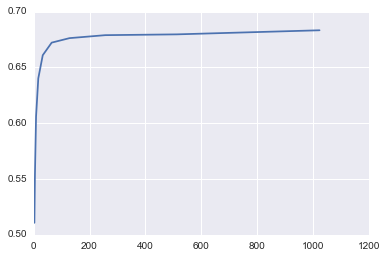

In [247]:
scores = sorted(scores.items())
_ = plot([n for n, score in scores], [score for n, score in scores])

4) С помощью feature\_importances\_  оцените, какие признаки были самыми важными в классификации